In [1]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Перекрестная проверка

- Перекрестная проверка представляет собой статистический метод оценки
обобщающей способности, который является более устойчивым и
основательным, чем разбиение данных на обучающий и тестовый наборы.
- В перекрестной проверке данные разбиваются несколько раз и строится
несколько моделей. Наиболее часто используемый вариант перекрестной
проверки – k-блочная кросс-проверка (k-fold cross-validation), в которой
k – это задаваемое пользователем число, как правило, 5 или 10.
- Для каждого из этих пяти
разбиений (splits) данных на обучающий и тестовый наборы мы
вычисляем правильность. В итоге мы зафиксировали пять значений
правильности. Процесс показан на рис. 5.1:

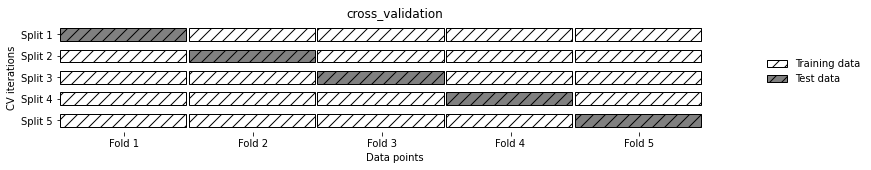

In [2]:
mglearn.plots.plot_cross_validation()

Рис. 5.1 Разбиение данных в пятиблочной перекрестной проверке

## Перекрестная проверка в библиотеке scikit-learn

В scikit-learn перекрестная проверка реализована с помощью функции
cross_val_score модуля model_selection. Аргументами функции
cross_val_score являются:
- оцениваемая модель
- обучающие данные
- фактические метки

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg, iris.data, iris.target)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.93333333 0.96666667 1.        ]


Мы
можем изменить количество блоков, задав другое значение параметра cv:

In [4]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=10)
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]


Наиболее распространенный способ подытожить правильность,
вычисленную в ходе перекрестной проверки, – это вычисление среднего
значения:

In [5]:
print("Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean()))

Средняя правильность перекрестной проверки: 0.97


Используя усредненное значение правильности для перекрестной
проверки, мы можем сделать вывод, что средняя правильность модели
составит примерно 97%. Взглянув на все пять значений правильности,
полученных в ходе пятиблочной перекрестной проверки, можно еще
сделать вывод о том, что:
- существует относительно высокий разброс
значений правильности, вычисленных для блоков, от 100% до 93%.
- Подобный результат может означать, что модель сильно зависит от
конкретных блоков, использованных для обучения
- а также это может
быть обусловлено небольшим размером набора данных.

## Преимущества перекрестной проверки

- Во-первых, вспомним что train_test_split выполняет
случайное разбиение данных. Представьте себе, что при выполнении
случайного разбиения данных нам «повезло», и все трудно
классифицируемые примеры в конечном итоге попали в обучающий
набор. В этом случае в тестовый набор попадут только «легкие» примеры,
и правильность на тестовом наборе будет неправдоподобно высокой. И,
наоборот, если нам «не повезло», все трудно классифицируемые примеры
попадают в тестовый набор и поэтому мы получаем неправдоподобно
низкую правильность.
- Однако при использовании перекрестной
проверки на каждой итерации в тестовый набор, использующийся для
проверки модели, попадают разные примеры. Таким образом, модель
должна хорошо обобщать все примеры в наборе данных, чтобы все
значения правильности (или их среднее) были высокими.
- Наличие нескольких разбиений дает определенную
информацию о том, насколько наша модель чувствительна к выбору
обучающего набора данных. 
- Применяя train_test_split, мы обычно
используем 75% данных для обучения и 25% данных для оценки
качества. Применяя пятиблочную перекрестную проверку, на каждой
итерации для подгонки модели мы можем использовать 4/5 данных
(80%). При использовании 10-блочной перекрестной проверки мы можем
использовать для подгонки модели 9/10 данных (90%). Больший объем
данных, как правило, приводит к построению более точных моделей.
- Основной недостаток перекрестной проверки – увеличение стоимости
вычислений. Поскольку теперь мы обучаем k моделей вместо одной
модели, перекрестная проверка будет выполняться примерно в k раз
медленнее, чем однократное разбиение данных.
- Кросс-валидация не является способом
построения модели, которую можно применить к новым данным.
Перекрестная проверка не возвращает модель. При вызове
cross_val_score строится несколько внутренних моделей, однако
цель перекрестной проверки заключается только в том, чтобы
оценить обобщающую способность данного алгоритма, обучив на
определенном наборе данных.

## Стратифицированная k-оболочная перекрестная проверка и другие стратегии

Описанное в предыдущем разделе разбиение данных на k блоков,
начиная с первого k-го блока, не всегда является хорошей идеей, тк значения могут быть отсортированы. 

Поскольку обычная k-блочная стратегия в данном случае терпит
неудачу, вместо нее библиотека scikit-learn предлагает использовать
для классификации стратифицированную k-блочную перекрестную
проверку (stratified k-fold cross-validation). В стратифицированной
перекрестной проверке мы разбиваем данные таким образом, чтобы
пропорции классов в каждом блоке в точности соответствовали
пропорциям классов в наборе данных, как это показано на рис. 5.2:

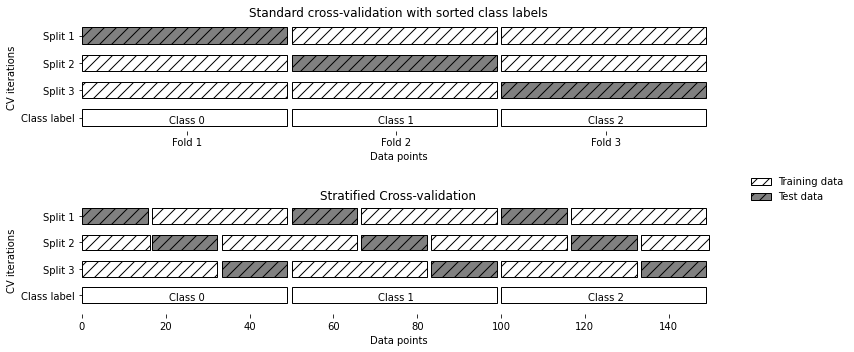

In [6]:
mglearn.plots.plot_stratified_cross_validation()

Рис. 5.2 Сравнение стандартной перекрестной проверки и стратифицированной
перекрестной проверки, когда данные упорядочены по меткам классов

- Например, если 90% примеров относятся к классу А, а 10% примеров
– к классу В, то стратифицированная перекрестная проверка
выполняется так, чтобы в каждом блоке 90% примеров принадлежали к
классу А, а 10% примеров – к классу B.
- Использование для оценки классификатора стратифицированной k-блочной перекрестной проверки вместо обычной k-блочной
перекрестной является хорошей идеей, поскольку позволяет получить
более надежные оценки обобщающей способности. В ситуации, когда
лишь 10% примеров принадлежат к классу В, использование стандартной
k-блочной перекрестной проверки может привести к тому, что один из
блоков будет полностью состоять из примеров, относящихся к классу А.
Использование этого блока в качестве тестового набора не даст особой
информации о качестве работы классификатора.

### Больше контроля над перекрестной проверкой

- Ранее мы уже видели, что можно настроить количество блоков,
используемое в cross_val_score, с помощью параметра cv. Однако
scikit-learn позволяет значительно точнее настроить процесс
перекрестной проверки, используя в качестве параметра cv генератор
разбиений перекрестной проверки (cross-validation splitter).
- В
большинстве случаев значения параметров, выставленные по умолчанию для k-блочной перекрестной проверки в случае регрессии и
стратифицированной k-блочной проверки в случае классификации дают
хорошие результаты, однако бывают ситуации, когда вы, возможно,
захотите использовать другую стратегию.
- Допустим, мы хотим
применить k-блочную перекрестную проверку к классификационному
набору данных, чтобы воспроизвести чьи-то результаты. Для этого мы
должны сначала импортировать класс KFold из модуля model_selection
и создать его экземпляр, задав нужное количество блоков:

In [7]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

Затем мы можем передать генератор разбиений kfold в качестве
параметра cv в функцию cross_val_score.

In [8]:
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[1.         1.         0.86666667 0.93333333 0.83333333]


Убедимся, что использование трехблочной
(нестратифицированной) перекрестной проверки для набора данных
iris действительно является очень плохой идеей:

In [9]:
kfold = KFold(n_splits=3)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0. 0. 0.]


Вспомним, что в наборе данных iris каждый блок соответствует
одному классу и поэтому, применив нестратифицированную
перекрестную проверку, мы ничего не сможем узнать о правильности
модели. 

Еще один способ решения этой проблемы состоит в том, чтобы
вместо стратификации перемешать данные и тем самым нарушить
порядок сортировки примеров, определяемый их метками. 
- Мы можем
сделать это, передав генератору KFold параметр shuffle=True. Если мы
перемешиваем данные, нам необходимо зафиксировать random_state,
чтобы воспроизвести результат перемешивания. В противном случае
каждый прогон cross_val_score будет давать разный результат,
поскольку каждый раз используется разное разбиение (это не является
проблемой, но может привести к неожиданным результатам).
Перемешивание данных перед их разбиением дает гораздо лучший
результат:

In [10]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Значения правильности перекрестной проверки:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Значения правильности перекрестной проверки:
[0.98 0.96 0.96]


### Перекрестная проверка с исключением по одному

Еще один часто используемый метод перекрестной проверки –
исключение по одному (leave-one-out). Перекрестную проверку с
исключением по одному можно представить в виде k-блочной
перекрестной проверки, в которой каждый блок представляет собой
отдельный пример. По каждому разбиению вы выбираете одну точку
данных в качестве тестового набора. Этот вид проверки может занимать
очень много времени, особенно при работе с большими наборами данных,
однако иногда позволяет получить более точные оценки на небольших
наборах данных:

In [11]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Количество итераций: ", len(scores))
print("Средняя правильность: {:.2f}".format(scores.mean()))

Количество итераций:  150
Средняя правильность: 0.97


### Перекрестная проверка со случайными перестановками при разбиении

Еще одной, очень гибкой стратегией перекрестной проверки является
перекрестная проверка со случайными перестановками при разбиении
(shuffle-split cross-validation). В этом виде проверки каждое разбиение
выбирает train_size точек для обучающего набора и test_size точек для
тестового набора (при этом обучающее и тестовое подмножества не
пересекаются). Точки выбираются с возвращением. Разбиение
повторяется n_iter раз. 

Рис. 5.3 иллюстрирует четырехпроходное
разбиение набора данных, состоящего из 10 точек, на обучающий набор
из 5 точек и тестовый набор из 2 точек (чтобы задать абсолютные
размеры этих подмножеств вы можете использовать для train_size и
test_size целочисленные значения, либо числа с плавающей точкой,
чтобы задать доли от общей выборки):

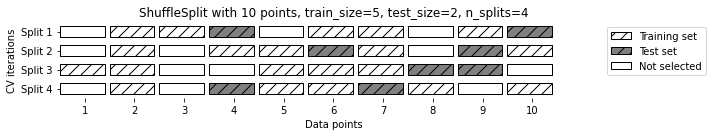

In [12]:
mglearn.plots.plot_shuffle_split()

Рис. 5.3 Перекрестная проверка со случайными перестановками при разбиении
для набора данных из 10 точек, train_size=5, test_size=2 и n_iter=4

Программный код, приведенный ниже, 10 раз разбивает данные на
50%-ный обучающий набор и 50%-ный тестовый набор:

In [13]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.97333333 0.97333333 0.94666667 0.97333333 0.98666667 1.
 0.94666667 0.96       1.         0.98666667]


- Перекрестная проверка со случайными перестановками при
разбиении позволяет задавать количество итераций независимо от
размеров обучающего и тестового наборов, что иногда может быть
полезно. 
- Кроме того, этот метод позволяет использовать на каждой
итерации лишь часть данных (значения train_size и test_size
необязательно должны в сумме давать 1). Подобное прореживание
данных может быть полезно при работе с большими наборами данных.
- Существует также стратифицированный вариант ShuffleSplit,
названный StratifiedShuffleSplit, который позволяет получить более
надежные результаты при решении задач классификации

### Перекрестная проверка с использованием групп

Еще одна весьма распространенная настройка для перекрестной
проверки применяется, когда данные содержат сильно взаимосвязанные
между собой группы.

Допустим, вы хотите построить систему
распознавания эмоций по фотографиям лиц и для этого вы собрали
набор изображений 100 человек, в котором каждый человек
сфотографирован несколько раз, чтобы зафиксировать разные эмоции.
Цель заключается в том, чтобы построить классификатор, который
сможет правильно определить эмоции людей, не включенных в этот
набор изображений. В данном случае для оценки качества работы
классификатора вы можете использовать традиционную
стратифицированную перекрестную проверку. Однако, вполне вероятно,
что фотографии одного и того же человека попадут как в обучающий, так
и в тестовый наборы. По сравнению с совершенно новым лицом классификатору намного проще будет определить эмоции по лицу,
которое уже встречалось ему в обучающем наборе. Чтобы точно оценить
способность модели обобщать результат на новые лица, необходимо
убедиться в том, что обучающий и тестовый наборы содержат
изображения разных людей.
- Для решения этой задачи мы можем воспользоваться GroupKFold,
принимающий в качестве аргумента массив groups. С помощью него мы
указываем, какой человек изображен на снимке. В данном случае массив
groups указывает группы данных, которые не следует разбивать при
создании обучающего и тестового наборов, при этом их не следует путать
с метками классов.

Приведем пример с использованием синтетического набора
данных, группировка данных задана массивом groups. Набор данных
состоит из 12 точек данных, и для каждой точки массив groups задает
группу (допустим, пациента), к которой относится эта точка. У нас
существуют четыре группы, первые три примера принадлежат к первой
группе, следующие четыре примера принадлежат ко второй группе и так
далее:

In [14]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
# создаем синтетический набор данных
X, y = make_blobs(n_samples=12, random_state=0)
# предположим, что первые три примера относятся к одной и той же группе,
# затем следующие четыре и так далее.
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Значения правильности перекрестной проверки:\n{}".format(scores))

Значения правильности перекрестной проверки:
[0.75       0.6        0.66666667]


Примеры не нужно сортировать по группам, мы сделали это в
иллюстративных целях. Разбиения, вычисляемые на основе этих меток,
показаны на рис. 5.4.
Видно, что при выполнении разбиении каждая группа полностью
попадает либо в обучающий набор, либо в тестовый набор:

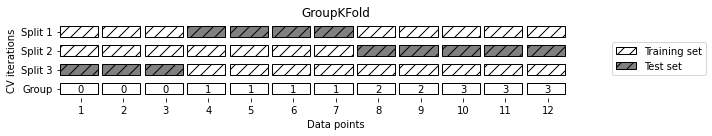

In [15]:
mglearn.plots.plot_group_kfold()

# Решетчатый поиск

Поиск оптимальных значений
параметров является общераспространенной задачей, библиотека
scikit-learn предлагает стандартные методы, позволяющие решить ее.
Наиболее часто используемый метод – это решетчатый поиск (grid
search), который по сути является попыткой перебрать все возможные
комбинации интересующих параметров.

Рассмотрим применение ядерного метода SVM с ядром RBF
(радиальной базисной функцией), реализованного в классе SVC. Как мы
уже говорили в главе 2, в ядерном методе опорных векторов есть два
важных параметра: ширина ядра gamma и параметр регуляризации C.
Допустим, мы хотим попробовать значения 0.001, 0.01, 0.1, 1, 10 и 100
для параметра С и то же самое для параметра gamma. Поскольку нам
нужно попробовать шесть различных настроек для C и gamma, получается
36 комбинаций параметров в целом. Все возможные комбинации
формируют таблицу (которую еще называют решеткой или сеткой)
настроек параметров для SVM

## Простой решетчатый поиск

Мы можем реализовать простой решетчатый поиск с помощью
вложенных циклов for по двум параметрам, обучая и оценивая
классификатор для каждой комбинации:

In [16]:
# naive grid search implementation
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Размер обучающего набора: {} размер тестового набора: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_test, y_test)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))

Размер обучающего набора: 112 размер тестового набора: 38
Наилучшее значение правильности: 0.97
Наилучшие значения параметров: {'C': 100, 'gamma': 0.001}


## Опасность переобучения параметров и проверочный набор данных

Получив такой результат, мы могли бы поддаться искушению и заявить,
что нашли модель, которая дает 97%-ную правильность на нашем наборе
данных. Однако это заявление может быть чрезмерно оптимистичным
(или просто неверным) по следующей причине: мы перебрали множество
значений параметров и выбрали ту комбинацию значений, которая дает
наилучшую правильность на тестовом наборе, но это вовсе не означает, что на новых данных мы получим такое же значение правильности.
- Поскольку мы использовали тестовый набор для настройки параметров,
мы больше не можем использовать его для оценки качества модели. Это
та же самая причина, по которой нам изначально нужно разбивать
данные на обучающий и тестовый наборы. Теперь для оценки качества
модели нам необходим независимый набор данных, то есть набор,
который не использовался для построения модели и настройки ее
параметров.
- Один из способов решения этой проблемы заключается в том, чтобы
разбить данные еще раз, таким образом, мы получаем три набора:
- - обучающий набор для построения модели
- - проверочный
(валидационный) набор для выбора параметров модели
- - тестовый набор для оценки качества работы выбранных параметров. 

Рис.5.5 показывает, как это выглядит:

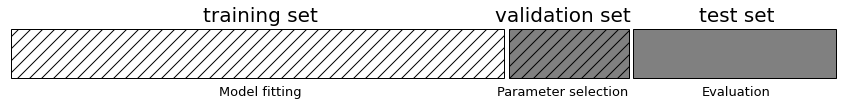

In [17]:
mglearn.plots.plot_threefold_split()

Рис. 5.5 Тройное разбиение данных на обучающий набор,
проверочный набор и тестовый набор

После выбора наилучших параметров с помощью проверочного
набора проверки, мы можем заново построить модель, используя
найденные настройки, но теперь на основе объединенных обучающих и
проверочных данных. Таким образом, мы можем использовать для
построения модели максимально возможное количество данных. Это
приводит к следующему программному коду:

In [18]:
from sklearn.svm import SVC
# разбиваем данные на обучающий+проверочный набор и тестовый набор
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# разбиваем обучающий+проверочный набор на обучающий и проверочный наборы
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора:"
    " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # оцениваем качество SVC на тестовом наборе
        score = svm.score(X_valid, y_valid)
        # если получаем наилучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате объединения обучающих
# и проверочных данных, оцениваем качество модели на тестовом наборе
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))

Размер обучающего набора: 84 размер проверочного набора: 28 размер тестового набора: 38

Лучшее значение правильности на проверочном наборе: 0.96
Наилучшие значения параметров:  {'C': 10, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.92


- Лучшее значение правильности на проверочном наборе составляет
96%, что немного ниже значения правильности, полученного для
тестового набора ранее, вероятно, из-за того, что мы использовали
меньше данных для обучения модели (размер X_train теперь стал
меньше, поскольку что мы разбили наш набор данных дважды).
- Однако
значение правильности на тестовом наборе, значение, которое
показывает реальную обобщающую способность – стало еще ниже, 92%.
Таким образом, мы можем утверждать, что правильность классификации
новых данных составляет 92%, а не 97%, как мы думали ранее!
- Любой выбор, сделанный,
исходя из правильности на тестовом наборе, «сливает» модели
информацию тестового набора. Поэтому важно иметь отдельный
тестовый набор, который используется лишь для итоговой оценки.
Осуществление всего разведочного анализа и отбора модели с помощью
комбинации обучающего и проверочного наборов и резервирование
тестового набора для итоговой оценки является хорошей практикой.
- Данная практика является верной даже при проведении разведочной
визуализации. Строго говоря, оценка качества моделей и выбор
наилучшей из них с помощью тестового набора, использующегося для
отбора параметров, приведет к чрезмерно оптимистичной оценке
правильности модели

Грубо говоря, без проверочного набора, когда мы проверяем модель и подгоняем коэффициенты на тестовом наборе, наши коэффициенты могут быть слишком зависить от тестового набора и любые отклонения от тестового набора покажут другую правильность модели. Чтобы узнать реальную правильность, мы подгоняем коэффициенты на проверочном наборе (вместо тестового), а затем проверяем их правильность на новых данных в виде тестового набора, которые никак не участвовали в процессе обучения.

## Решетчатый поиск с перекрестной проверкой

- Хотя только что рассмотренный нами метод разбиения данных на
обучающий, проверочный и тестовый наборы является вполне рабочим
и относительно широко используемым, он весьма чувствителен к
правильности разбиения данных. 
- Взглянув на вывод, приведенный для
предыдущего фрагмента программного кода, мы видим, что GridSearchCV выбрал в качестве лучших параметров 'C': 10, 'gamma': 0.001, тогда
как вывод, приведенный для программного кода в предыдущем разделе,
сообщает нам, что наилучшими параметрами являются 'C': 100,
'gamma': 0.001. 
- Для лучшей оценки обобщающей способности вместо
одного разбиения данных на обучающий и проверочный наборы мы
можем воспользоваться перекрестной проверкой. Теперь качество
модели оценивается для каждой комбинации параметров по всем
разбиениям перекрестной проверки. Этот метод можно реализовать с
помощью следующего программного кода:

In [19]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # для каждой комбинации параметров,
        # обучаем SVC
        svm = SVC(gamma=gamma, C=C)
        # выполняем перекрестную проверку
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # вычисляем среднюю правильность перекрестной проверки
        score = np.mean(scores)
        # если получаем лучшее значение правильности, сохраняем значение и параметры
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# заново строим модель на наборе, полученном в результате
# объединения обучающих и проверочных данных
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

Чтобы c помощью пятиблочной перекрестной проверки оценить
правильность SVM для конкретной комбинации значений C и gamma, нам
необходимо обучить 36*5=180 моделей. Как вы понимаете, основным
недостатком использования перекрестной проверки является время,
которое требуется для обучения всех этих моделей.

Как мы уже говорили ранее, перекрестная проверка – это способ
оценить качество работы конкретного алгоритма на определенном
наборе данных. Однако она часто используется в сочетании с
методами поиска параметров типа решетчатного поиска. По этой
причине многие люди в разговорной речи под термином
перекрестная проверка
(cross-validation) подразумевают
решетчатый поиск с перекрестной проверкой.

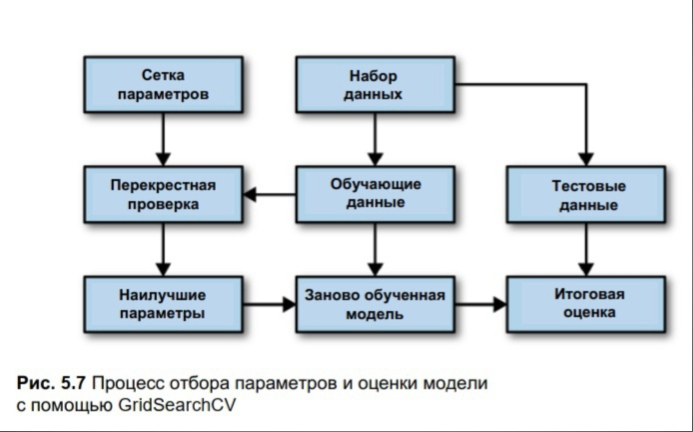

- Поскольку решетчатый поиск с перекрестной проверкой является
весьма распространенным методом настройки параметров, библиотека
scikit-learn предлагает класс GridSearchCV, в котором решетчатый
поиск реализован в виде модели. 
- Чтобы воспользоваться классом
GridSearchCV, сначала необходимо указать искомые параметры с
помощью $словаря$. GridSearchCV построит все необходимые модели.
Ключами словаря являются имена настраиваемых параметров (в данном
случае С и gamma), а значениями – тестируемые настройки параметров.
Перебор значений 0.001, 0.01, 0.1, 1, 10 и 100 для C и gamma требует
словаря следующего вида:

In [20]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Сетка параметров:\n{}".format(param_grid))

Сетка параметров:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


Теперь мы можем создать экземпляр класса GridSearchCV, передав
модель (SVC), сетку искомых параметров (param_grid), а также стратегию
перекрестной проверки, которую мы хотим использовать (допустим,
пятиблочную стратифицированную перекрестную проверку):

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

Вместо разбиения на обучающий и проверочный набор,
использованного нами ранее, GridSearchCV запустит перекрестную
проверку. Однако нам по-прежнему нужно разделить данные на
обучающий и тестовый наборы, чтобы избежать переобучения
параметров:

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

Модель scikit-learn, которая создается с помощью другой модели называется метамоделью (metaestimator
). GridSearchCV является наиболее часто используемой метамоделью, но об этом мы
поговорим позже

Созданный нами объект grid_search аналогичен классификатору, мы
можем вызвать стандартные методы fit, predict и score от его имени:

In [23]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

Процесс подгонки объекта GridSearchCV включает в себя не только
поиск лучших параметров, но и автоматическое построение новой модели
на всем обучающем наборе данных. Чтобы оценить обобщающую способность найденных наилучших
параметров, мы можем вызвать метод score:

In [24]:
print("Правильность на тестовом наборе: {:.2f}".format(grid_search.score(X_test, y_test)))

Правильность на тестовом наборе: 0.97


- Выбрав параметры с помощью перекрестной проверки, мы
фактически нашли модель, которая достигает правильности 97% на
тестовом наборе. Главный момент здесь в том, что мы не использовали
тестовый набор для отбора параметров.
- Найденная комбинация
параметров сохраняется в атрибуте best_params_
- наилучшее значение
правильности перекрестной проверки сохраняется в атрибуте best_score_

In [25]:
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 10, 'gamma': 0.1}
Наилучшее значение кросс-валидац. правильности:0.97


Будьте осторожны, чтобы не перепутать best_score_ со
значением обобщающей способности модели, которое
вычисляется на тестовом наборе с помощью метода score. Метод
score (оценивающий качество результатов, полученных с
помощью метода predict) использует модель, построенную на
всем обучающем наборе данных. В атрибуте best_score_
записывается средняя правильность перекрестной проверки. Для
ее вычисления используется модель, построенная на обучающем
наборе перекрестной проверки.

Посмотреть наилучшую модель, построенную на всем
обучающем наборе, вы можете с помощью атрибута best_estimator_:

In [26]:
print("Наилучшая модель:\n{}".format(grid_search.best_estimator_))

Наилучшая модель:
SVC(C=10, gamma=0.1)


### Анализ результатов перекрестной проверки

- Поскольку выполнение решетчатого поиска
довольно затратно с вычислительной точки зрения, целесообразно
начинать поиск с простой и небольшой сетки параметров.
- Затем мы
можем проверить результаты решетчатого поиска, использовав
перекрестную проверку, и, возможно, расширить наш поиск. 
- Результаты
решетчатого поиска можно найти в атрибуте cv_results, который
является словарем, хранящим все настройки поиска.

In [27]:
import pandas as pd
# преобразуем в DataFrame
results = pd.DataFrame(grid_search.cv_results_)
# показываем первые 5 строк
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002999,3.371748e-07,0.001799,0.000400,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
1,0.002998,5.091228e-07,0.001799,0.000399,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
2,0.002805,4.030890e-04,0.001799,0.000400,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
3,0.002999,2.861023e-07,0.001599,0.000490,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22
4,0.002902,1.938822e-04,0.001501,0.000447,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,22


- Каждая строка в results соответствует одной конкретной
комбинации параметров. Для каждой комбинации записываются
результаты всех разбиений перекрестной проверки, а также среднее
значение и стандартное отклонение по всем разбиениям. 
- Поскольку мы
осуществляли поиск на основе двумерной сетки параметров (C и gamma),
наилучший способ визуализировать этот процесс, представить его в виде
тепловой карты (рис. 5.8). 
- Сначала мы извлечем средние значения
правильности перекрестной проверки, затем изменим форму массива со
значениями так, чтобы оси соответствовали C и gamma:

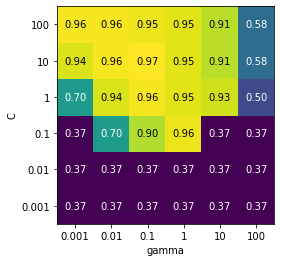

In [28]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# строим теплокарту средних значений правильности перекрестной проверки
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis");

Рис. 5.8 Тепловая карта для усредненной правильности перекрестной проверки,
выраженной в виде функции двух параметров С и gamma

- Параметры, которые мы
корректировали, очень важны для получения хорошей обобщающей
способности. Оба параметра (C и gamma) имеют большое значение,
поскольку их корректировка позволяет повысить правильность с 40% до
96%.
- Интервалы значений, которые мы выбрали для
параметров, представляют собой диапазоны, в которых мы видим
существенные изменения результатов.

Посмотрим на графики, где результат получился менее идеальным, поскольку
диапазоны поиска не были подобраны правильно:

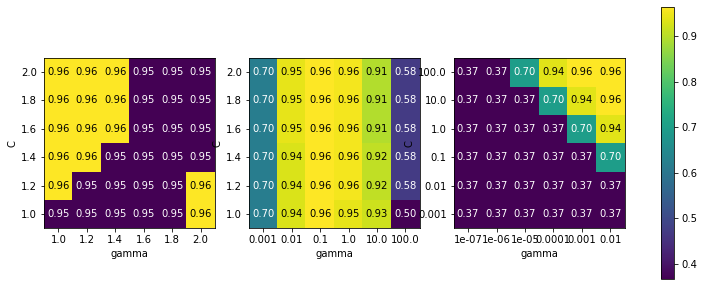

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    # строим теплокарту средних значений правильности перекрестной проверки
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist());

Рис. 5.9 Теплокарты для неправильно подобранных
диапазонов поиска

На первом графике опечатка с цветом видимо

- Как правило,
сначала лучше задать крайние значения, чтобы посмотреть, меняется ли
правильность в результате корректировки параметра.
- Настройка сетки параметров с помощью перекрестной проверки – это
хороший способ исследовать важность различных параметров
- Как мы уже обсуждали ранее, значения различных параметров не должны
проверяться на итоговом тестовом наборе
- Качество модели на тестовом
наборе должно оцениваться лишь один раз, когда мы точно знаем, какую
модель хотим использовать

### Экономичный решетчатый поиск

В некоторых случаях перебор всех возможных комбинаций по всем
параметрам, который обычно выполняет GridSearchCV, не является
хорошей идеей. Например, SVC имеет параметр kernel, и в зависимости
от того, какое ядро выбрано, все остальные параметры будут иметь
соответствующие этому выбору значения. Если kernel='linear', модель
является линейной и используется только параметр С. Если используется
kernel='rbf', используются параметры C и gamma (однако другие
параметры типа degree не используются). В этом случае поиск по всем
возможным комбинациям C, gamma и kernel не имеет смысла: если
kernel='linear', то gamma не используется и перебор различных
значений gamma – это пустая трата времени.

Чтобы обработать подобные
«условные» параметры, GridSearchCV позволяет превратить param_grid в
список словарей. Каждый словарь в списке выделяется в
самостоятельную сетку параметров. Возможный решетчатый поиск,
включающий настройки ядра и параметров, мог бы выглядеть
следующим образом:

In [30]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


Теперь давайте
применим этот более сложный поиск параметров:

In [31]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Наилучшие значения параметров: {}".format(grid_search.best_params_))
print("Наилучшее значение кросс-валидац. правильности:{:.2f}".format(grid_search.best_score_))

Наилучшие значения параметров: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Наилучшее значение кросс-валидац. правильности:0.97


Давайте снова посмотрим на cv_results_. Как и следовало ожидать,
если kernel имеет значение 'linear', то меняется только параметр C:

In [32]:
results = pd.DataFrame(grid_search.cv_results_)
# мы выводим транспонированную таблицу для лучшего отображения на странице:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.003425,0.002803,0.002798,0.002798,0.002799,0.003302,0.002798,0.002996,0.002721,0.002598,...,0.001999,0.001999,0.003194,0.003798,0.002599,0.002412,0.002128,0.002,0.002199,0.001999
std_fit_time,0.000383,0.000247,0.000401,0.000399,0.0004,0.000402,0.0004,0.000006,0.000391,0.00049,...,0.000001,0.000001,0.000403,0.0004,0.00049,0.000506,0.000257,0.000001,0.0004,0.000001
mean_score_time,0.001381,0.001489,0.001599,0.0016,0.001399,0.001901,0.001506,0.001599,0.001677,0.001799,...,0.000999,0.001399,0.0016,0.001799,0.0012,0.000993,0.00087,0.000999,0.000731,0.000799
std_score_time,0.000371,0.000439,0.00049,0.00049,0.000489,0.000197,0.000447,0.000491,0.000413,0.0004,...,0.0,0.000489,0.00049,0.0004,0.0004,0.000013,0.000258,0.000001,0.000389,0.0004
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


### Применение различных стратегий перекрестной проверки с помощью решетчатого поиска

Как и cross_val_score, GridSearchCV использует по умолчанию kблочную перекрестную проверку для классификации и k-блочную
перекрестную проверку для регрессии. Однако при использовании
GridSearchCV вы можете дополнительно передать любой генератор
разбиения (как было описано в разделе «Больше контроля над
перекрестной проверкой») в качестве параметра cv. В частности, чтобы
получить только одно разбиение на обучащий и проверочный наборы, вы
можете воспользоваться ShuffleSplit или StratifiedShuffleSplit с
n_iter=1. Данная настройка может оказаться полезной для очень
больших наборов данных или очень медленных моделей.

### Вложенная перекрестная проверка

- В предыдущих примерах мы прошли путь от использования одного
разбиения данных на обучающий, проверочный и тестовый наборы
(раздел «Опасность переобучения параметров и проверочный набор
данных»)
- до разбиения данных на обучающий и тестовый наборы с
проведением перекрестной проверки на обучающем наборе (раздел
«Решетчатный поиск с перекрестной проверкой»)
- Но при
использовании GridSearchCV ранее описанным способом мы все еще
выполняем всего лишь одно разбиение на обучающий и тестовый наборы,
что может привести к получению нестабильных результатов и ставит нас
в зависимость от этого единственного разбиения данных
- Мы можем
пойти дальше и вместо однократного разбиения исходных данных на
обучающий и тестовый наборы использовать несколько разбиений
перекрестной проверки. В результате мы получим вложенную
перекрестную проверкой (nested cross-validation).
- Во вложенной
перекрестной проверке используется внешний цикл по разбиениям
данных на обучающий и тестовый наборы. Для каждого из них
выполняется решетчатый поиск (в результате чего для каждого
разбиения внешнего цикла можно получить разные наилучшие
параметры)
- Затем для каждого внешнего разбиения выводится
правильность на тестовом наборе с использованием наилучших
параметров
- Результатом этой процедуры является не модель и не настройки
параметров, а список значений правильности
- Значения правильности
указывают нам на обобщающую способность модели с использованием
лучших параметров, найденных в ходе решетчатого поиска
- Поскольку
вложенная перекрестная проверка не дает модель, которую можно
использовать на новых данных, ее редко используют при поиске
прогнозной модели для применения к новым данным. Тем не менее, она может быть полезна для оценки работы модели на конкретном наборе
данных.
- Реализовать вложенную перекрестную проверку в scikit-learn
довольно просто. Мы вызываем cross_val_score и передаем ей
экземпляр GridSearchCV в качестве модели:

In [33]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)
print("Значения правильности перекрестной проверки: ", scores)
print("Среднеее значение правильности перекрестной проверки: ", scores.mean())

Значения правильности перекрестной проверки:  [0.96666667 1.         0.9        0.96666667 1.        ]
Среднеее значение правильности перекрестной проверки:  0.9666666666666668


- Результат нашей вложенной перекрестной проверки можно
резюмировать так: «на наборе данных iris модель SVC может достигнуть
средней правильности перекрестной проверки 98%» – ни больше, ни
меньше.
- В данном случае мы использовали стратифицированную
пятиблочную перекрестную проверку как во внутреннем, так и во
внешнем циклах. Поскольку наша сетка param_grid содержит 36
комбинаций параметров, будет построено целых 36 * 5 * 5 = 900 моделей,
что делает процедуру вложенной перекрестной проверки очень затратной
с вычислительной точки зрения
- Данный процесс можно
визуализировать с помощью циклов for, как это сделано в следующей
упрощенной реализации программного кода:

In [34]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # для каждого разбиения данных во внешней перекрестной проверке
    # (метод split возвращает индексы)
    for training_samples, test_samples in outer_cv.split(X, y):
        # находим наилучшие параметры с помощью внутренней перекрестной проверки
        best_parms = {}
        best_score = -np.inf
        # итерируем по параметрам
        for parameters in parameter_grid:
            # собираем значения правильности по всем внутренним разбиениям
            cv_scores = []
            # итерируем по разбиениям внутренней перекрестной проверки
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # строим классификатор с данными параметрами на внутреннем обучающем наборе
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # оцениваем качество на внутреннем тестовом наборе
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
                # вычисляем среднее значение правильности по внутренним блокам
                mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # если лучше, чем предыдущие, запоминаем параметры
                best_score = mean_score
                best_params = parameters
        # строим классификатор с лучшими параметрами на внешнем обучающем наборе
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # оцениваем качество на внешнем тестовом наборе
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)

Применим эту функцию к набору данных iris:

In [35]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
                   StratifiedKFold(5), SVC, ParameterGrid(param_grid))
print("Значения правильности перекрестной проверки: {}".format(scores))

Значения правильности перекрестной проверки: [0.96666667 1.         0.96666667 0.96666667 1.        ]


### Распараллеливание перекрестной проверки и решетчатого поиска

Построение моделей при решетчатом поиске независимо друг от друга, поэтому можно использовать распараллеливание по нескольким процессорным ядрам. 
-  В
GridSearchCV и cross_val_score вы можете использовать несколько
процессорных ядер, задав значение параметра n_jobs равным нужному количеству ядер. Также вы можете установить n_jobs=-1, чтобы использовать
все доступные ядра.

Имейте в виду, что scikit-learn не поддерживает вложенность
параллельных операций
(nesting of parallel operations). Поэтому, если вы
используете опцию n_jobs для вашей модели (например, для случайного
леса), вы не можете использовать ее в GridSearchCV для осуществления
поиска по этой модели. 

# Метрики качества модели и их вычисление

На практике
эти метрики качества могут не соответствовать вашим задачам и поэтому
очень важно при отборе моделей и корректировке параметров подобрать
правильную метрику.

## Помните о конечной цели

- Прежде чем
выбрать показатель качества машинного обучения, вам стоит подумать о
высокоуровневой цели вашего проекта, которую часто называют бизнесметрикой
(business metric).
- Последствия, обусловленные выбором
конкретного алгоритма для того или иного проекта, называются влиянием на бизнес (business impact).

- Вы должны выбрать такую модель или такие значения
параметров, которые оказывают наибольшее положительное влияние на
бизнес-метрику. Часто эта задача является трудной, поскольку оценка
влияния конкретной модели на бизнес может потребовать ее внедрения
в реальное производство.
- Как правило, на ранних этапах разработки, а также при настройке
параметров внедрить модель в производство только для тестирования не
представляется возможным по причине возникновения высоких
коммерческих и человеческих рисков.

- Метрика должна использоваться по возможности для оценки и
отбора модели
- Возможно, что в результате этой процедуры вы не
получите какой-то конкретной цифры, например, вывод, найденный с
помощью алгоритма, может звучат так: у вас на 10% больше клиентов, но
каждый клиент будет тратить на 15% меньше – однако эта процедура
должна оценить влияние на бизнес, зависящее от выбора той или иной
модели.

## Метрики для бинарной классификации

- Прежде чем мы
углубимся в альтернативные метрики, давайте рассмотрим ситуации, в
которых правильность измерения может ввести в заблуждение.
- Вспомним, что в случае бинарной классификации мы говорим о
положительном
(positive) классе и отрицательном (negative) классе,
подразумевая под положительным классом интересующий нас класс.

### Типы ошибок

Вспомним, что в случае бинарной классификации мы говорим о
положительном
(positive) классе и отрицательном (negative) классе,
подразумевая под положительным классом интересующий нас класс. Здесь мы называем положительным тестом (наличие
рака) положительный класс, а отрицательный тест соответствует
отрицательному классу.
- Одна из возможных ошибок заключается в том, что здоровый пациент
будет классифицирован как больной (положительный класс), что даст
повод для дополнительного тестирования. Пример,
неправильно спрогнозированный как положительный, называется ложно
положительным
(false positive). 
- Другая возможная ошибка состоит в том,
что больной пациент будет классифицирован как здоровый
(отрицательный класс), не пройдет дополнительные тесты и не получит
лечения. Пример, неправильно спрогнозированный как
отрицательный, называется ложно отрицательным (false negative).
- В
статистике ложно положительный пример также известен как ошибка I
рода
(type I error), а ложно отрицательный пример – как ошибка II рода
(type II error). 
- В примере с
диагностикой рака очевидно, что мы хотим минимизировать долю ложно
отрицательных примеров, тогда как ложно положительные примеры
можно считать гораздо менее значительной неприятностью.

### Несбалансированные наборы данных

Наборы данных, в
которых один класс встречается гораздо чаще, чем остальные, часто
называют несбалансированными наборами данных (imbalanced datasets)
или наборами данных с несбалансированными классами (datasets with
imbalanced classes). В реальности несбалансированные данные являются
нормой и редко бывает, что интересующий класс встречался в данных с
одинаковой или почти такой же частотой, что и остальные классы.

На основе набора данных digits (задача о определении нарисованных цифр)
создадим несбалансированный набор данных с пропорциями 9:1, создав
два класса «не-девятка» и «девятка»:

In [36]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

Мы можем воспользоваться DummyClassifier, который всегда
предсказывает мажоритарный класс (в данном случае класс «недевятка»), чтобы проиллюстрировать, насколько малоинформативной
может быть правильность:

In [37]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}".format(np.unique(pred_most_frequent)))
print("Правильность на тестовом наборе: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Уникальные спрогнозированные метки: [False]
Правильность на тестовом наборе: 0.90


Мы получили 90%-ную правильностью без какого-либо обучения. Давайте сравним этот результат с результатом, полученным с
помощью реальной модели:

In [38]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Правильность на тестовом наборе: {:.2f}".format(tree.score(X_test, y_test)))

Правильность на тестовом наборе: 0.92


С точки зрения правильности DecisionTreeClassifier оказался чуть
лучше, чем DummyClassifier, постоянно предсказывающего
мажоритарный класс. Это может означать, что либо мы неправильно
использовали DecisionTreeClassifier, либо правильность на самом деле
не является в данном случае адекватной метрикой.

Для сравнения давайте оценим качество еще двух классификаторов,
LogisticRegression и обычный DummyClassifier, который выдает
случайные прогнозы:

In [39]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("правильность dummy: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1,max_iter = 1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("правильность logreg: {:.2f}".format(logreg.score(X_test, y_test)))

правильность dummy: 0.90
правильность logreg: 0.98


- Проблема здесь заключается в том, что для
несбалансированных наборов данных правильность не является
адекватной метрикой, позволяющей количественно оценить
прогностическую способность модели.
- В частности, нам нужны такие метрики,
которые позволяют сравнить правильность модели машинного обучения
с правильностью классификатора, всегда предсказывающего «наиболее
часто встречающийся класс», или случайного классификатора (в данном
случае такие классификаторы были вычислены с помощью
pred_most_frequent и pred_dummy).

### Матрица ошибок

Одним из наиболее развернутых способов, позволяющих оценить
качество бинарной классификации, является использование матрицы
ошибок. Давайте исследуем прогнозы модели LogisticRegression,
построенной в предыдущем разделе, с помощью функции
confusion_matrix. Прогнозы для тестового набора данных мы уже
сохранили в pred_logreg:

In [40]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Матрица ошибок:\n{}".format(confusion))

Матрица ошибок:
[[402   1]
 [  6  41]]


Вывод confusion_matrix представляет собой массив размером 2x2, где
строки соответствуют фактическим классам, а столбцы соответствуют
спрогнозированным классам. В данном случае речь идет о классах «недевятка» и «девятка». Число в каждой ячейке показывает количество
примеров, когда спрогнозированный класс, представленный столбцом,
совпадает или не совпадает с фактическим классом, представленным
строкой.

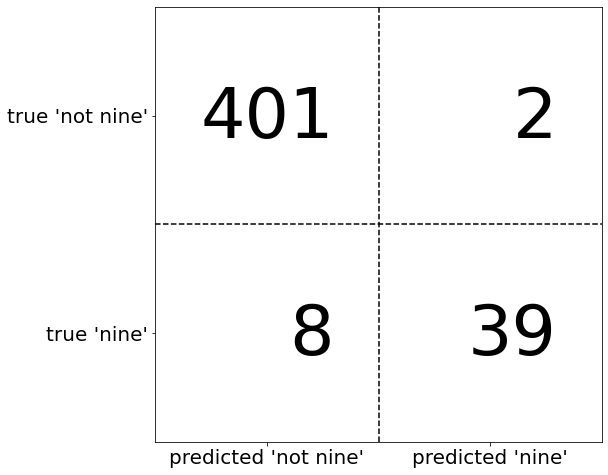

In [41]:
mglearn.plots.plot_confusion_matrix_illustration()

Рис. 5.10 Матрица ошибок для классификационной задачи
«девятка против остальных»

- Элементы главной диагонали матрицы ошибок соответствуют
правильным прогнозам (результатам классификации), тогда как
остальные элементы показывают, сколько примеров, относящихся к
одному классу, были ошибочно классифицированы как другой класс.
- Объявив «девятку» положительным классом, мы можем рассмотреть
элементы матрицы ошибок в терминах ложно положительных (false
positive
) и ложно отрицательных (false negative) примеров, которые мы
ввели ранее. 
- Для полноты картины мы назовем правильно
классифицированные положительные примеры истинно
положительными
(true positive), а правильно классифицированные
отрицательные примеры – истинно отрицательными (true negative). Эти
термины, как правило, записывают в сокращенном виде как FP, FN, TP
и TN и приводят к следующей интерпретации матрицы ошибок (рис.5.11):

Тест на наличие рака (позитивный, если тест показал, что рак есть):
- TN - на здоровом показал здорового
- TP - на больном показал больного
- FP - на здоровом показал больного
- FN - на больном показал здорового

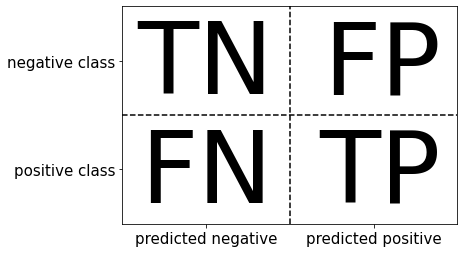

In [42]:
mglearn.plots.plot_binary_confusion_matrix()

Рис. 5.11 Матрица ошибок для бинарной классификации

Теперь давайте воспользуемся матрицей ошибок для сравнения ранее
построенных моделей (две дамми-модели, дерево решений, а также
логистическая регрессия):

In [43]:
print("Наиболее часто встречающийся класс:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nДамми-модель:")
print(confusion_matrix(y_test, pred_dummy))
print("\nДерево решений:")
print(confusion_matrix(y_test, pred_tree))
print("\nЛогистическая регрессия")
print(confusion_matrix(y_test, pred_logreg))

Наиболее часто встречающийся класс:
[[403   0]
 [ 47   0]]

Дамми-модель:
[[403   0]
 [ 47   0]]

Дерево решений:
[[390  13]
 [ 24  23]]

Логистическая регрессия
[[402   1]
 [  6  41]]


- Взглянув на матрицу ошибок, становится совершенно ясно, что с
моделью pred_most_frequent что-то не так, потому что она всегда
предсказывает один и тот же класс.
- С другой стороны, модель pred_dummy
характеризуется очень маленьким количеством истинно положительных
примеров (4) по сравнению с остальными примерами, при этом
количество ложно положительных примеров существенно больше
количества истинно положительных примеров! 
- Прогнозы, полученные с
помощью дерева решений, несут гораздо больше смысла, чем прогнозы
дамми-модели, хотя правильность у этих моделей почти одинаковая.
- И,
наконец, мы видим, что прогнозы логистической регрессии лучше
прогнозов pred_tree во всех аспектах: она имеет большее количество
истинно положительных и истинно отрицательных примеров, в то время
количество ложно положительных и ложно отрицательных примеров
стало меньше. 

Из этого сравнения ясно, что лишь дерево решений и
логистическая регрессия дают разумные результаты, при этом
логистическая регрессия работает лучше дерева во всех отношениях.
Однако интерпретация матрицы ошибок немного громоздка и хотя мы
получили массу информации, анализируя все аспекты матрицы, процесс
работы с матрицей ошибок был трудоемким и сложным. 
- Есть несколько
способов обобщить информацию, содержащуюся в матрице ошибок. О
них мы поговорим в следующем разделе.

#### Связь с правильностью

Мы уже знакомы с одним из способов обобщить результаты матрицы –
вычислением правильности (accuracy), которую можно выразить в виде следующей
формулы:

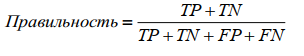

Другими словами, правильность – это количество верно
классифицированных примеров (TP и TN), поделенное на общее
количество примеров (суммируем все элементы матрицы ошибок).

#### Точность, полнота, и F-мера

Есть еще несколько способов подытожить информацию матрицы
ошибок, наиболее часто используемыми из них являются точность и
полнота.

Точность (precision) показывает, сколько из предсказанных
положительных примеров оказались действительно положительными.
Таким образом, точность – это доля истинно положительных примеров
от общего количества предсказанных положительных примеров.

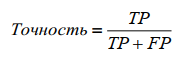

Точность используется в качестве показателя качества модели, когда
цель состоит в том, чтобы снизить количество ложно положительных
примеров; другими словами, необходимо увеличить точность.
- Точность также
известна как прогностическая ценность положительного результата
(positive predictive value, PPV).

С другой стороны, полнота (recall) показывает, сколько от общего
числа фактических положительных примеров было предсказано как
положительный класс. Полнота – это доля истинно положительных
примеров от общего количества фактических положительных примеров.

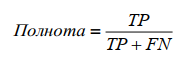

Полнота используется в качестве показателя качества модели, когда
нам необходимо определить все положительные примеры, то есть, когда
важно снизить количество ложно отрицательных примеров. 
Другие
названия полноты:
- чувствительность (sensitivity)
- процент
результативных ответов или хит-рейт (hit rate)
- доля истинно
положительных примеров (true positive rate, TPR)

Пример
диагностики рака, приведенный ранее в этой главе, является хорошей
иллюстрацией подобной задачи: важно выявить всех больных пациентов,
при этом, возможно, включив в их число здоровых пациентов.

Всегда необходимо найти компромисс между оптимизацией полноты
и оптимизацией точности.

Хотя точность и полнота являются очень важными метриками, сами
по себе они не дадут вам полной картины. Одним из способов
подытожить их является F-мера (F-measure), которая представляет собой
гармоническое среднее точности и полноты:

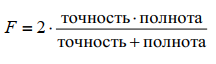

Этот вариант вычисления F-меры еще известен как f1-мера. Поскольку
f1-мера учитывает точность и полноту, то для бинарной классификации
несбалансированных данных она может быть более лучшей метрикой,
чем правильность.

Этот вариант вычисления F-меры еще известен как f1-мера. Поскольку
f1-мера учитывает точность и полноту, то для бинарной классификации
несбалансированных данных она может быть более лучшей метрикой,
чем правильность.

In [44]:
from sklearn.metrics import f1_score

print("f1-мера наибольшая частота: {:.2f}".format(
    f1_score(y_test, pred_most_frequent)))
print("f1-мера дамми: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-мера дерево: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-мера логистическая регрессия: {:.2f}".format(
    f1_score(y_test, pred_logreg)))

f1-мера наибольшая частота: 0.00
f1-мера дамми: 0.00
f1-мера дерево: 0.55
f1-мера логистическая регрессия: 0.92


Использовав f-меру для оценки
качества, мы снова подытоживаем прогностическую способность с
помощью одного числа. Однако, похоже, что f-мера действительно дает
более лучшее представление о качестве модели, чем правильность.
Вместе с тем недостаток f-меры заключается в том, что в отличие от
правильности ее труднее интерпретировать и объяснить.

Если мы хотим получить более развернутый отчет о точности,
полноте и f1-мере, можно воспользоваться удобной функцией
classification_report, чтобы вычислить все три метрики сразу и
распечатать их в привлекательном виде:

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Функция classification_report печатает отчет, в котором выводятся
показатели точности, полноты и f-меры для отрицательного и
положительного классов. Миноритарный класс «девятка» считается
положительным классом. Значение f-меры для него равно 0. Для
мажоритарного класса «не-девятка» значение f-меры равно 0.94. Кроме
того, полнота для класса «не-девятка» равна 1, поскольку мы
классифицировали все примеры как «не-девятки». Крайний правый
столбец – это поддержка (support), которая равна фактическому
количеству примеров данного класса.
- В последней строке отчета приводятся средние значения метрик,
взвешенные по количеству фактических примеров в каждом классе.
Поясним процесс вычисления взвешенного среднего значения для
примере f-метрики. Сначала вычисляем веса отрицательного и
положительного классов. Вес отрицательного класса равен 403/450=0.90.
Вес положительного класса равен 47/450=0.10. Теперь
спрогнозированное значение f-меры для каждого класса умножаем на вес
соответствующего класса, складываем результаты и получаем
взвешенное среднее значение f-меры: 0.90 x 0.94 + 0.10 x 0.00 = 0.85.

In [46]:
print(classification_report(y_test, pred_dummy,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
print(classification_report(y_test, pred_logreg,
                            target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



Различия между даммимоделью и моделью логистической регрессии уже не столь очевидны.
Решение о том, какой класс объявить положительным, имеет большое
влияние на метрики.

Проанализировав все показатели вместе, можно составить довольно точную картину и четко увидеть превосходство
модели логистической регрессии.

### Принимаем во внимание неопределенность

####################################

Как мы уже говорили в главе 2, большинство
классификаторов для оценки степени достоверности прогнозов
позволяют использовать методы decision_function или predict_proba.
Получить прогнозы можно, установив для decision_function или
predict_proba пороговое значение в некоторой фиксированной точке – в
случае бинарной классификации мы используем 0 для решающей
функции и 0.5 для метода predict_proba.

In [48]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

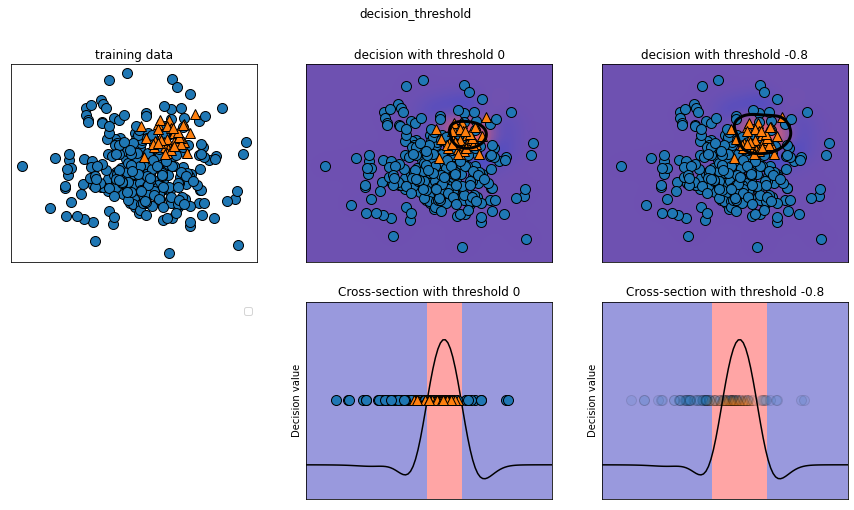

In [49]:
mglearn.plots.plot_decision_threshold()

Рис. 5.12 Тепловая карта решающей функции и влияние
изменения порогового значения на результат

In [50]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



Давайте предположим, что в нашем примере гораздо важнее получить
высокое значение полноты для класса, как в случае со скринингом рака,
приведенном ранее. Это означает, что мы готовы допустить большее
количество ложных срабатываний (случаев, когда неверно
спрогнозирован класс 1), что даст нам большее количество истинно
положительных примеров (то есть увеличит значение полноты).
Прогнозы, полученные с помощью svc.predict, не отвечают этому
требованию, но мы можем скорректировать их, чтобы получить более
высокое значение полноты для класса 1. Для этого необходимо изменить
пороговое значение для принятия решений. По умолчанию точки данных со значениями решающей функции больше 0 будут классифицироваться
как класс 1. Мы хотим увеличить количество точек данных,
прогнозируемых как класс 1, поэтому нужно снизить пороговое значение:

In [51]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [52]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



### Кривые точности-полноты и ROC-кривые

Изменение порога, используемого для
классификации решений модели – это способ, позволяющий найти
компромисс между точностью и полнотой для данного классификатора.
Возможно, вы хотите пропустить менее 10% положительных примеров,
таким образом, желаемое значение полноты составит 90%. Решение
зависит от конкретного примера и оно должно определяться бизнесцелями. Как только поставлена конкретная цель, скажем, задано
конкретное значение полноты или точности для класса, можно
установить соответствующий порог. Всегда можно задать то или иное
пороговое значение для реализации конкретной цели (например,
достижения значения полноты 90%). Трудность состоит в разработке
такой модели, которая при этом пороге еще и будет иметь приемлемое
значение точности, ведь классифицировав все примеры как
положительные, вы получите значение полноты, равное 100%, но при
этом ваша модель будет бесполезной.

Требование, выдвигаемое к качеству модели (например, значение
полноты должно быть 90%), часто называют рабочей точкой (operating
point
). Фиксирование рабочей точки часто бывает полезно в контексте
бизнеса, чтобы гарантировать определенный уровень качества клиентам
или другим группам лиц внутри организации.
Как правило, при разработке новой модели нет четкого представления
о том, что будет рабочей точкой. По этой причине, а также для того,
чтобы получить более полное представление о решаемой задаче, полезно
сразу взглянуть на все возможные пороговые значения или все
возможные соотношения точности и полноты для этих пороговых
значений. Данную процедуру можно осуществить с помощью
инструмента, называемого кривой точности-полноты (precision-recall
curve
). Функцию для вычисления кривой точности-полноты можно
найти в модуле sklearn.metrics. Ей необходимо передать фактические
метки классов и спрогнозированные вероятности, вычисленные с
помощью decision_function или predict_proba:

In [53]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))

In [54]:
precision

array([0.32142857, 0.2962963 , 0.30769231, 0.32      , 0.33333333,
       0.34782609, 0.36363636, 0.38095238, 0.4       , 0.36842105,
       0.33333333, 0.35294118, 0.375     , 0.4       , 0.42857143,
       0.38461538, 0.41666667, 0.45454545, 0.4       , 0.44444444,
       0.5       , 0.57142857, 0.66666667, 0.6       , 0.5       ,
       0.66666667, 0.5       , 1.        , 1.        ])

In [55]:
recall

array([1.        , 0.88888889, 0.88888889, 0.88888889, 0.88888889,
       0.88888889, 0.88888889, 0.88888889, 0.88888889, 0.77777778,
       0.66666667, 0.66666667, 0.66666667, 0.66666667, 0.66666667,
       0.55555556, 0.55555556, 0.55555556, 0.44444444, 0.44444444,
       0.44444444, 0.44444444, 0.44444444, 0.33333333, 0.22222222,
       0.22222222, 0.11111111, 0.11111111, 0.        ])

In [56]:
thresholds

array([-0.7512563 , -0.58749402, -0.48739733, -0.44364565, -0.40435353,
       -0.28965335, -0.24173165, -0.19257469, -0.17852475, -0.16644845,
       -0.1601932 ,  0.08620484,  0.14630375,  0.19153373,  0.36988055,
        0.52008479,  0.5230006 ,  0.53195462,  0.63212214,  0.74430046,
        0.87212596,  0.88002558,  0.88395198,  0.97789353,  1.00010384,
        1.07030762,  1.08436417,  1.25059991])

Функция precision_recall_curve возвращает список значений
точности и полноты для всех возможных пороговых значений (всех
значений решающей функции) в отсортированном виде, поэтому мы
можем построить кривую, как показано на рис. 5.13:

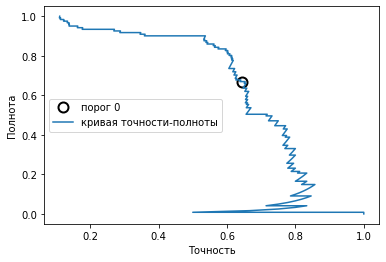

In [57]:
# используем больший объем данных, чтобы получить более гладкую кривую
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2],
                  random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
# находим ближайший к нулю порог
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="порог 0", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="кривая точности-полноты")
plt.xlabel("Точность")
plt.ylabel("Полнота")
plt.legend(loc="best")

Рис. 5.13 Кривая точности-полноты для SVC (gamma=0.05)

- Каждая точка на кривой (рис. 5.13) соответствует возможному
пороговому значению решающей функции. Например, видно, что мы
можем достичь полноты 0.4 при точности около 0.75. Черный кружок
отмечает точку, соответствующую порогу 0, пороговому значению по умолчанию для решающей функции. Данная точка является
компромиссом, который выбирается при вызове метода predict.
- Чем ближе кривая подходит к верхнему правом углу, тем лучше
классификатор. Точка в верхнем правом углу означает высокое значение
точности и высокое значение полноты для соответствующего порога.
Кривая начинается в верхнем левом углу, что соответствует очень
низкому порогу, все примеры классифицируются как положительный
класс. Повышение порога перемещает кривую в сторону более высоких
значений точности и в то же время более низких значений полноты. При
дальнейшем повышении порога мы получаем ситуацию, в которой
большинство точек, классифицированных как положительные, являются
истинно пложительными, что приводит к очень высокой точности, но
более низкому значению полноты. Чем больше модель сохраняет высокое
значение полноты при одновременном увеличении точности, тем лучше.
- Взглянув на эту кривую чуть более пристально, можно увидеть, что с
помощью построенной модели можно добиться точности в районе 0.5 при
очень высоком значении полноты. Если мы хотим получить гораздо
более высокое значение точности, мы должны в значительной степени
пожертвовать полнотой. Другими словами, слева наша кривая выглядит
относительно плоской, это означает, что при увеличении точности
полнота падает незначительно. Однако, чтобы получить значение
точности более 0.5, нам придется пожертвовать значительным
снижением полноты.
- Различные классификаторы могут давать хорошее качество на
различных участках кривой, то есть в разных рабочих точках. Давайте
сравним модель SVM с моделью случайного леса, построенной на том же
наборе данных. RandomForestClassifier вместо decision_function
использует метод predict_proba. Функция precision_recall_curve
ожидает, что в качестве второго аргумента ей будет передана вероятность
положительного класса (класса 1), то есть rf.predict_proba(X_test)[:,
1]. В бинарной классификации пороговое значение по умолчанию для
predict_proba равно 0.5, поэтому мы отметили эту точку на кривой (см.
рис. 5.14):

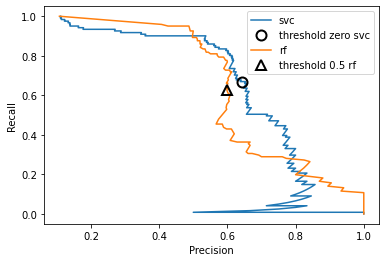

In [58]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

Рис. 5.14 Сравнение кривых точности-полноты
для SVM и случайного леса

Из сравнительного графика видно, что случайный лес дает лучшее
качество, чем в SVM, для крайних пороговых значений, позволяя
получить очень высокое значение точности или очень высокое значение
полноты. Что касается центральной части кривой (соответствует
примерной точности=0.7), то SVM работает лучше. Если бы мы для
сравнения обобщающей способности в целом анализировали лишь f1-
меру, мы упустили бы из виду эти тонкости. f1-мера учитывает только
одну точку на кривой точности-полноты, точку, определяемую порогом
по умолчанию.

In [59]:
print("f1-мера random forest: {:.3f}".format(
f1_score(y_test, rf.predict(X_test))))
print("f1-мера svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1-мера random forest: 0.610
f1-мера svc: 0.656


Сравнение двух кривых точности-полноты дает много детальной
информации, но представляет собой довольно трудоемкий процесс.
Чтобы выполнить автоматическое сравнение моделей мы могли бы
обобщить информацию, содержащуюся в кривой, не ограничиваясь
конкретным пороговым значением или рабочей точкой. Один из
способов подытожить информацию кривой заключается в вычислении
интеграла или площади под кривой точности-полноты, он также известен
как метод средней точности (average precision). 34 Для вычисления
средней точности вы можете воспользоваться функцией
average_precision_score. Поскольку нам нужно вычислить ROCкривую и рассмотреть несколько пороговых значений, функции
average_precision_score вместо результата predict нужно передать
результат decision_function или predict_proba:

In [60]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Средняя точность random forest: {:.3f}".format(ap_rf))
print("Средняя точность svc: {:.3f}".format(ap_svc))

Средняя точность random forest: 0.660
Средняя точность svc: 0.666


При усреднении по всем возможным пороговым значением мы видим,
что случайный лес и SVC дают примерно одинаковое качество модели,
при этом случайный даже чуть-чуть вырывается вперед. Это в
значительном мере отличаются от результата, полученного нами ранее с
помощью f1_score. Поскольку средняя точность равна площади под
кривой, которая принимает значения от 0 до 1, средняя точность всегда
возвращает значение от 0 (худшее значение) до 1 (лучшее значение).
Средняя точность случайного классификатора равна доле
положительных примеров в наборе данных.

### Рабочая характеристика приемника (ROC) и AUC

Еще один инструмент, который обычно используется для анализа
поведения классификаторов при различных пороговых значениях – это
кривая рабочей характеристики приемника (receiver operating
characteristics curve) или кратко ROC-кривая (ROC curve). Как и кривая
точности-полноты, ROC-кривая позволяет рассмотреть все пороговые
значения для данного классификатора, но вместо точности и полноты
она показывает долю ложно положительных примеров (false positive rate,
FPR
) в сравнении с долей истинно положительных примеров (true positive rate
). Вспомним, что доля истинно положительных примеров –
это просто еще одно название полноты, тогда как доля ложно
положительных примеров – это доля ложно положительных примеров от
общего количества отрицательных примеров:

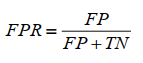

ROC-кривую можно вычислить с помощью функции roc_curve (см.
рис. 5.15):

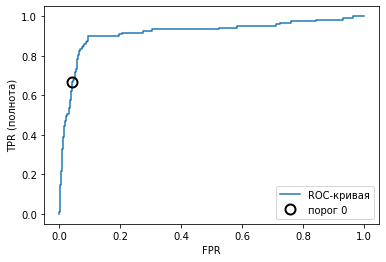

In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC-кривая")
plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
# находим пороговое значение, ближайшее к нулю
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="порог 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

Рис. 5.15 ROC-кривая для SVM

Идеальная ROC-кривая проходит через левый верхний угол,
соответствуя классификатору, который дает высокое значение полноты
при низкой доле ложно положительных примеров. Проанализировав
значения полноты и FPR для порога по умолчанию 0, мы видим, что
можем достичь гораздо более высокого значения полноты (около 0.9)
лишь при незначительном увеличении FPR. Точка, ближе всего расположенная к верхнему левому углу, возможно, будет лучшей рабочей
точкой, чем та, что выбрана по умолчанию. Опять же, имейте в виду, что
для выбора порогового значения следовать использовать отдельный
проверочный набор, а не тестовые данные.
- На рис. 5.16 вы можете сравнить случайный лес и SVM с помощью
ROC-кривых:

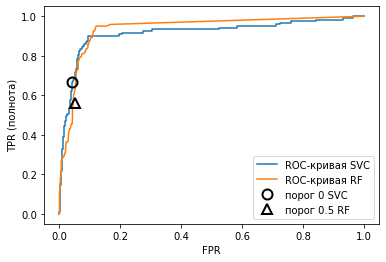

In [62]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC-кривая SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC-кривая RF")

plt.xlabel("FPR")
plt.ylabel("TPR (полнота)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="порог 0 SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="порог 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

Рис. 5.16 Сравнение ROC-кривых для SVM и случайного леса

Как и в случае с кривой точности-полноты, мы хотим подытожить
информацию ROC-кривой с помощью одного числа, площади под кривой
(обычно ее просто называют AUC, при этом имейте в виду, что речь идет
о ROC-кривой). Мы можем вычислить площадь под ROC-кривой с
помощью функции roc_auc_score:

In [63]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC для случайного леса: {:.3f}".format(rf_auc))
print("AUC для SVC: {:.3f}".format(svc_auc))

AUC для случайного леса: 0.937
AUC для SVC: 0.916


- Сравнив случайный лес и SVM с помощью AUC, мы можем сделать
вывод, что случайный лес дает чуть более лучшее качество модели, чем
SVM. Напомним, поскольку средняя точность – это площадь под кривой,
которая принимает значения от 0 до 1, средняя точность всегда
возвращает значение от 0 (худшее значение) до 1 (лучшее значение).
Случайный классификатор соответствует значению AUC 0.5, независимо
от того, как сбалансированы классы в наборе данных. Поэтому метрика
AUC является более оптимальной, чем правильность при решении задач
несбалансированной классификации. AUC можно интерпретировать как
меру качества ранжирования положительных примеров. Значение
площади под кривой эквивалентно вероятности того, что согласно
построенной модели случайно выбранный пример положительного
класса будет иметь более высокий балл, чем случайно выбранный пример
отрицательного класса. Таким образом, идеальное значение AUC, равное
1, означает, что все положительные примеры в отличие от отрицательных
имеют более высокий балл. В задачах несбалансированной
классификации применение AUC для отбора модели зачастую является
более целесообразным, чем использование правильности.
- Давайте вернемся к задаче, которую мы решали ранее, классифицируя
в наборе digits девятки и остальные цифры. Мы классифицируем
наблюдения, используя SVM с тремя различными настройками ширины
ядра и gamma (см. рис. 5.17):

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.05  accuracy = 0.90  AUC = 1.00
gamma = 0.01  accuracy = 0.90  AUC = 1.00


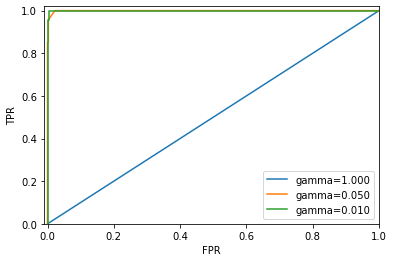

In [64]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

Рис. 5.17 Сравнение ROC-кривых для SVM
с различными настройками gamma

- Правильность при использовании различных значений gamma остается
одинаковой и составляет 90%. Одинаковое значение правильности может
быть случайностью, а может быть нет. Однако взглянув на AUC и
соответствующую кривую, мы видим четкое различие между этими
тремя моделями. При gamma=1.0 значение AUC фактически
соответствует случайному классификатору (случайному результату
decision_function). При gamma=0.05 качество модели резко повышается.
И, наконец, при gamma=0.01, мы получим идеальное значение AUC,
равное 1.0. Это означает, что в соответствии с решающей функцией все
положительные примеры получают более высокий балл, чем все
отрицательные примеры. Другими словами, с помощью правильного
порогового значения эта модель может идеально классифицировать
данные! Зная это, мы можем скорректировать пороговое значение для этой модели и получить правильные прогнозы. Если бы мы использовали
только одну точность, у нас не было бы этой информации.
- По этой причине мы настоятельно рекомендуем использовать AUC
для оценки качества моделей на несбалансированных данных. Однако
имейте в виду, что в AUC не используется порог по умолчанию, таким
образом, чтобы на основе модели с высоким значением AUC получить
полезный классификатор, возможно, потребуется корректировка
порогового значения.

## Метрики для мультиклассовой классификации

В основном, все
метрики для мультиклассовой классификации являются производными
от метрик классификации, но при этом усредняются по всем классам. В
мультиклассовой классификации правильность вновь определяется как
доля правильно классифицированных примеров. И опять же, когда
классы не сбалансированы, правильность перестает быть адекватной
метрикой оценки качества. Представьте себе задачу трехклассовой
классификации, когда 85% точек данных принадлежат к классу А, 10% –
к классу В и 5% – к классу C. Что означает среднее значение
правильности 85% применительно к этому набору данных? В целом
результаты мультиклассовой классификации труднее интерпретировать,
чем результаты бинарной классификации. Помимо правильности часто
используемыми инструментами являются матрица ошибок и отчет о
результатах классификации, которые мы рассматривали, разбирая
случай бинарной классификации в предыдущем разделе. Давайте
применим эти два метода оценки для классификации 10 различных
рукописных цифр в наборе данных digits:

In [65]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Модель имеет точность 95.3%, что уже говорит нам об очень хорошем
качестве модели. Матрица ошибок дает нам несколько более подробную
информацию. Как и в случае бинарной классификации, каждая строка
соответствует фактической метке класса, а каждый столбец соответствует
спрогнозированной метке класса. Вы можете построить более наглядный
график, приведенный на рис. 5.18:

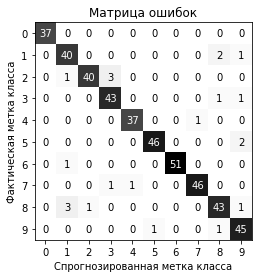

In [66]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Спрогнозированная метка класса',
    ylabel='Фактическая метка класса', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Матрица ошибок")
plt.gca().invert_yaxis()

Рис. 5.18 Матрица ошибок для десятиклассовой задачи распознавания
рукописных цифр

- Фактическое количество примеров, относящихся к первому классу
(цифре 0), равно 37 и все эти примеры были классифицированы как
класс 0 (то есть ложно отрицательные примеры для класса 0
отсутствуют). Об этом говорит тот факт, что все остальные элементы
первой строки матрицы ошибок имеют нулевые значения. Кроме того, ни
одна из остальных цифр не была ошибочно классифицирована как 0,
поскольку все остальные элементы первого столбца имеют нулевые
значения (то есть ложно положительные примеры для класса 0
отсутствуют). Однако некоторые цифры были спутаны с остальными,
например, цифра 2 (третья строка), три примера, являющиеся цифрой 2,
были классифицированы как цифра 3 (четвертый столбец). Кроме того,
у нас есть одна цифра 3, классифицированная как 2 (третий столбец,
четвертая строка), и одна цифра 8, классифицированная как 2 (третий
столбец, девятая строка).
- С помощью функции classification_report мы можем вычислить
точность, полноту и f-меру для каждого класса:

In [67]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



- Неудивительно, что для класса 0 получены идеальные значения
точности и полноты, равные 1, поскольку все примеры
классифицированы правильно. Для класса 7 получена идеальная
точность, поскольку отсутствуют ложно положительные примеры (ни
один из остальных классов не был ошибочно классифицирован как класс
7), тогда как для класса 6 получена идеальная полнота, поскольку
отсутствуют ложно отрицательные примеры. Кроме того, видно, что
модель испытывает ряд трудностей при классификации цифр 8 и 3.
- Наиболее часто используемой метрикой для оценки качества
мультиклассовой классификации для несбалансированных наборов
данных является мультиклассовый вариант f-меры. Идея, лежащая в
основе мультиклассовой f-меры, заключается в вычислении одной
бинарной f-меры для каждого класса, интересующий класс становится
положительным, а все остальные – отрицательными классами. Затем эти f-меры для каждого класса усредняются с использованием одной из
следующих стратегий:

- "macro" усреднение вычисляет f1-меры для каждого класса и находит
их невзвешенное среднее. Всем классам, независимо от их размера,
присваивается одинаковый вес.
- "weighted" усреднение вычисляет f-меры для каждого класса и
находит их среднее, взвешенное по поддержке (количеству
фактических примеров для каждого класса). Эта стратегия
используется в классификационном отчете по умолчанию.
- "micro" усреднение вычисляет общее количество ложно
положительных примеров, ложно отрицательных примеров и истинно
положительных примеров по всем классам, а затем вычисляет
точность, полноту и f-меру с помощью этих показателей.

Если вам необходимо присвоить одинаковый вес каждому примеру,
рекомендуется использовать микро-усреднение f1-меры, если вам
необходимо присвоить одинаковый вес каждому классу, рекомендуется
использовать макро-усреднение f1-меры:

In [68]:
print("Микро-усредненная f1-мера: {:.3f}".format
      (f1_score(y_test, pred, average="micro")))
print("Mакро-усредненная f1-мера: {:.3f}".format
      (f1_score(y_test, pred, average="macro")))
print("Weighted-усредненная f1-мера: {:.3f}".format
      (f1_score(y_test, pred, average="weighted")))

Микро-усредненная f1-мера: 0.951
Mакро-усредненная f1-мера: 0.952
Weighted-усредненная f1-мера: 0.951


## Метрики регрессии

Оценить качество регрессии можно таким же способом, которой мы
использовали для классификации, например, сравнив количество
завышенных и заниженных расчетных значений зависимой переменной.
Однако в большинстве рассмотренных примеров будет достаточно
применения R2, который в методе score используется по умолчанию для
всех моделей регрессии. Иногда бизнес-решения принимаются на основе
среднеквадратической ошибки или средней абсолютной ошибки, что
является стимулом для использования этих метрик при настройке
моделей. Однако в целом мы пришли к выводу, что с точки зрения
оценки качества регрессионных моделей R2 является более понятной
метрикой.

## Использование метрик оценки для отбора модели

Часто нам нужно воспользоваться метриками типа AUC для
отбора модели, выполняемого на основе GridSearchCV или
cross_val_score. К счастью, scikit-learn предлагает очень простой
способ решения этой задачи с помощью аргумента scoring, который
можно использовать как в GridSearchCV, так и в cross_val_score. Вы
можете просто задать строку с описанием необходимой метрики оценки.
Допустим, мы хотим оценить качество классификатора SVM при
решении задачи «девять против остальных» для набора данных digits,
используя значение AUC. Чтобы поменять метрику оценки с
правильности, установленной по умолчанию, на AUC, достаточно
указать "roc_auc" в качестве параметра scoring:

In [69]:
# метрика качества классификационной модели по умолчанию – правильность
print("Метрика качества по умолчанию: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9)))
# значение параметра scoring="accuracy" не меняет результатов
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
                                    scoring="accuracy")
print("Метрика качества явно заданная правильность: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
                          scoring="roc_auc")
print("Метрика качества AUC: {}".format(roc_auc))

Метрика качества по умолчанию: [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества явно заданная правильность: [0.975      0.99166667 1.         0.99442897 0.98050139]
Метрика качества AUC: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [70]:
X_train, X_test, y_train, y_test = train_test_split(
digits.data, digits.target == 9, random_state=0)

# задаем не самую удачную сетку параметров для иллюстрации:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# используем метрику по умолчанию, то есть правильность:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Решетчатый поиск c использованием правильности")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекр проверки (правильность)): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))

Решетчатый поиск c использованием правильности
Наилучшие параметры: {'gamma': 0.0001}
Наилучшее значение перекр проверки (правильность)): 0.976
AUC на тестовом наборе: 0.992
Правильность на тестовом наборе: 0.973


In [71]:
# используем метрику качества AUC:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nРешетчатый поиск с использованием AUC")
print("Наилучшие параметры:", grid.best_params_)
print("Наилучшее значение перекр проверки (AUC): {:.3f}".format(grid.best_score_))
print("AUC на тестовом наборе: {:.3f}".format(
    roc_auc_score(y_test, grid.decision_function(X_test))))
print("Правильность на тестовом наборе: {:.3f}".format(grid.score(X_test, y_test)))


Решетчатый поиск с использованием AUC
Наилучшие параметры: {'gamma': 0.01}
Наилучшее значение перекр проверки (AUC): 0.998
AUC на тестовом наборе: 1.000
Правильность на тестовом наборе: 1.000


Когда использовалась правильность, был выбран параметр
gamma=0.0001, тогда как при использовании AUC был выбран gamma=
0.01. В обоих случаях правильность перекрестной проверки
соответствует правильности на тестовом наборе. Однако использование
AUC позволила найти настройку параметра, оптимальную с точки
зрения AUC и даже с точки зрения правильности.

Наиболее важными значениями параметра scoring для
классификации являются: 
- accuracy (по умолчанию)
- roc_auc для
площади под ROC-кривой
- average_precision (площадь под кривой
точности-полноты)
- f1
- f1_macro
- f1_micro
- f1_weighted для бинарной
f1-меры и различных стратегий усреднения

Для регрессии, наиболее
часто используемыми значениями являются 
- r2 для R2
- mean_squared_error для среднеквадратической ошибки
- mean_absolute_error для средней абсолютной ошибки